# Graph Theory and Network Science

Graph Theory is another area in Mathematics that has been gaining popularity in the recent years. In this notebook, we will explore some real-life applications of Graph Theory.

The most basic python package for creating, manipulating, and analyzing graphs/networks is `networkx`.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

## Creating Graphs

Let's start by creating some graphs. To do this, we need to define `nodes` and `edges`.

### Example 1

In [2]:
# Initialize Graph
G = nx.Graph()

In [3]:
type(G)

networkx.classes.graph.Graph

In [4]:
# adding edges
G.add_edge(1,3)
G.add_edge(1,4)
G.add_edge(2,4)
G.add_edge(4,3)

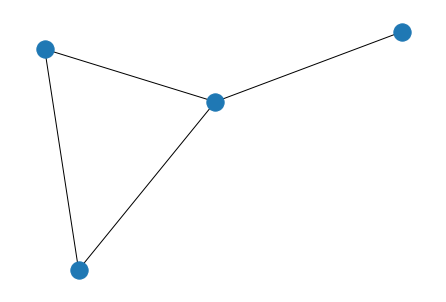

In [5]:
# plot the Graph
nx.draw(G)

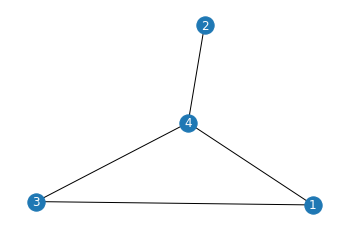

In [6]:
# add network labels
pos = nx.spring_layout(G) # position/layout to be used in the graph
nx.draw_networkx_labels(G, pos, font_color='white')
nx.draw(G, pos=pos)

Note: the `pos` variable we used above is only one for the several options. Check them out [here](https://networkx.github.io/documentation/networkx-1.10/reference/drawing.html#layout).

In [7]:
# we can also add additional nodes
G.add_node(5)

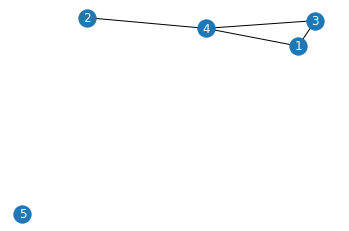

In [8]:
pos = nx.spring_layout(G)
nx.draw_networkx_labels(G, pos, font_color='white')
nx.draw(G, pos=pos)

In [9]:
# connect node 5 to node 4
G.add_edge(4, 5)

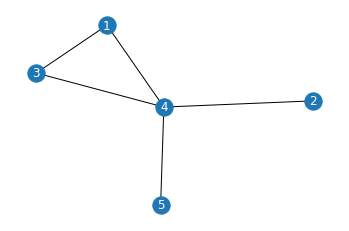

In [10]:
pos = nx.spring_layout(G)
nx.draw_networkx_labels(G, pos, font_color='white')
nx.draw(G, pos=pos)

### Example 2

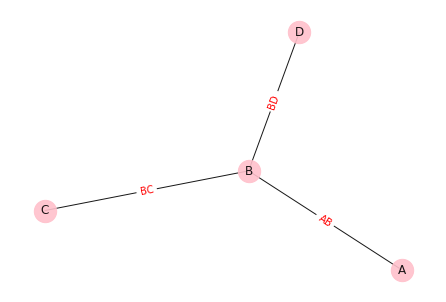

In [11]:
# initialize empty Graph object
G = nx.Graph()

# define edges to be included
edges = [['A', 'B'], ['B', 'C'], ['B', 'D']]

# add edges from list
G.add_edges_from(edges)

# setup position
pos = nx.spring_layout(G)

# draw Graph
nx.draw(G, pos, edge_color='black', width=1, linewidths=1, node_size=500,
        node_color='pink', alpha=0.9,
        labels={node: node for node in G.nodes()} # use node names as label
)

# add edge labels
nx.draw_networkx_edge_labels(G, pos,
                             edge_labels={('A', 'B'): 'AB',
                                          ('B', 'C'): 'BC',
                                          ('B', 'D'): 'BD'},
                             font_color='red'
);

### Example 3: Application of Graph Coloring

This example is taken from the book "A First Course in Mathematical Modeling" by Frank R. Giordano, William P. Fox, and Steven B. Horton. [Link to Amazon](https://www.amazon.com/First-Course-Mathematical-Modeling/dp/1285050908).

**Problem Statement**  
The Mathematics Department at a small college plans to schedule final exams. The class rosters for all the upper-class math courses are listed below. Create a graph where the courses are represented as nodes and two courses has an edge if they have at least one student in common.

#### Data

In [12]:
courses = {'math350': ['Jimi', 'B.B.', 'Eric'],
           'math365': ['Ry', 'Jimmy P.', 'Carlos'],
           'math385': ['Jimi', 'Chrissie', 'Bonnie', 'Brian'],
           'math420': ['Bonnie', 'Robin', 'Carlos'],
           'math430': ['Ry', 'B.B.', 'Buddy', 'Robin'],
           'math445': ['Brian', 'Buddy'],
           'math460': ['Jimi', 'Ry', 'Brian', 'Mark']}

#### List the nodes

In [13]:
nodes = list(courses.keys())
nodes

['math350', 'math365', 'math385', 'math420', 'math430', 'math445', 'math460']

#### Get all node pairs

In [14]:
# how many pairs are there
len(nodes)*(len(nodes) - 1) / 2

21.0

We expect to have a maximum of 21 edges out from the 7 nodes.

In [15]:
# import function to get the pairs
from itertools import combinations

In [16]:
potential_edges = list(combinations(nodes, 2))
potential_edges

[('math350', 'math365'),
 ('math350', 'math385'),
 ('math350', 'math420'),
 ('math350', 'math430'),
 ('math350', 'math445'),
 ('math350', 'math460'),
 ('math365', 'math385'),
 ('math365', 'math420'),
 ('math365', 'math430'),
 ('math365', 'math445'),
 ('math365', 'math460'),
 ('math385', 'math420'),
 ('math385', 'math430'),
 ('math385', 'math445'),
 ('math385', 'math460'),
 ('math420', 'math430'),
 ('math420', 'math445'),
 ('math420', 'math460'),
 ('math430', 'math445'),
 ('math430', 'math460'),
 ('math445', 'math460')]

In [17]:
# sanity check: how many combinations did we get?
len(potential_edges)

21

#### Determine Courses With At Least 1 Student in Common

Now that we have all the pairs, we will check if a given pair have at least one student in common. We will show how that is done in Python below:

In [18]:
# example: check if math350 and math365 has a student in common
s1 = courses['math350']
s1

['Jimi', 'B.B.', 'Eric']

In [19]:
s2 = courses['math365']
s2

['Ry', 'Jimmy P.', 'Carlos']

In [20]:
set(s1).intersection(set(s2))

set()

From above, we see that the courses do not have a common student.

In [21]:
# check if math350 and math430 has a student in common
s1 = courses['math350']
s2 = courses['math430']

s1, s2

(['Jimi', 'B.B.', 'Eric'], ['Ry', 'B.B.', 'Buddy', 'Robin'])

In [22]:
set(s1).intersection(set(s2))

{'B.B.'}

In [23]:
def has_intersection(course1, course2):
    s1 = set(courses[course1])
    s2 = set(courses[course2])
    
    intersection = s1.intersection(s2)
    n_students = len(intersection)
    
    return n_students > 0

In [24]:
has_intersection('math350', 'math430')

True

In [25]:
has_intersection('math350', 'math365')

False

In [26]:
edges = []

for c1, c2 in potential_edges:
    if has_intersection(c1, c2):
        edges.append([c1, c2])

In [27]:
edges

[['math350', 'math385'],
 ['math350', 'math430'],
 ['math350', 'math460'],
 ['math365', 'math420'],
 ['math365', 'math430'],
 ['math365', 'math460'],
 ['math385', 'math420'],
 ['math385', 'math445'],
 ['math385', 'math460'],
 ['math420', 'math430'],
 ['math430', 'math445'],
 ['math430', 'math460'],
 ['math445', 'math460']]

#### Create the Graph

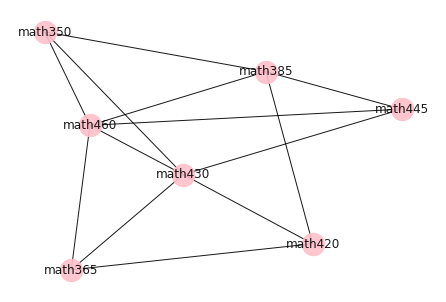

In [28]:
G_courses = nx.Graph()

# add edges from list
G_courses.add_edges_from(edges)

# setup position
pos = nx.spring_layout(G_courses)

# draw Graph
nx.draw(G_courses, pos, edge_color='black', width=1, linewidths=1, node_size=500,
        node_color='pink', alpha=0.9,
        labels={node: node for node in G_courses.nodes()} # use node names as label
)

#### Graph Coloring and Application
The idea of graph coloring is to find the smallest number of colors needed to color the nodes such that adjacent nodes never share the same color. 

Application: In our example, we created a graph to represent courses that has common students. If we schedule a final exam, two courses that shares a common student cannot be scheduled in parallel. In this case, coloring the graph translates to determining the minimum number of exam schedules needed to avoid conflicts in schedule.

In [29]:
schedules = nx.coloring.greedy_color(G_courses)
schedules

{'math430': 0,
 'math460': 1,
 'math385': 0,
 'math350': 2,
 'math365': 2,
 'math420': 1,
 'math445': 2}

The result above shows that we only need 3 exam schedules and we also know which ones to schedule together.

In [30]:
G_courses.nodes

NodeView(('math350', 'math385', 'math430', 'math460', 'math365', 'math420', 'math445'))

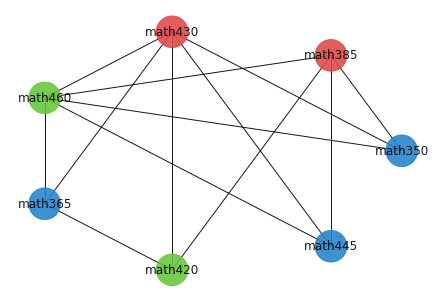

In [31]:
# custom colors
colors = ['#df4b4b', '#69c83e', '#2986cc']

# draw Graph
pos = nx.circular_layout(G_courses)
nx.draw(G_courses, pos, edge_color='black', width=1, linewidths=1,
        node_size=1000, alpha=0.9,
        node_color=[colors[schedules[node]] for node in G_courses.nodes()],
        labels={node: node for node in G_courses.nodes()} # use node names as label
)

## Network Structure Properties

### Zachary's Karate Club

To introduce properties of real-world networks, we will use a famous social network known as [Zachary's Karate Club](https://en.wikipedia.org/wiki/Zachary%27s_karate_club) describe in a paper "An Information Flow Model for Conflict and Fission in Small Groups" by Wayne W. Zachary.

The article [An Introduction to Social Network Analysis with NetworkX: Two Factions of a Karate Club](https://deepnote.com/@deepnote/An-Introduction-to-Social-Network-Analysis-with-NetworkX-Two-Factions-of-a-Karate-Club-c38c10bf-3fab-4e97-8a66-9c7c0eb972ad) describes this social network as follows:

>The network models the relationships between 34 members of a karate club: each node represents to an individual, and the links/edges represent individuals who interact outside of the karate club setting (e.g. spending social time together, like meeting up for a coffee, seperate to karate).  

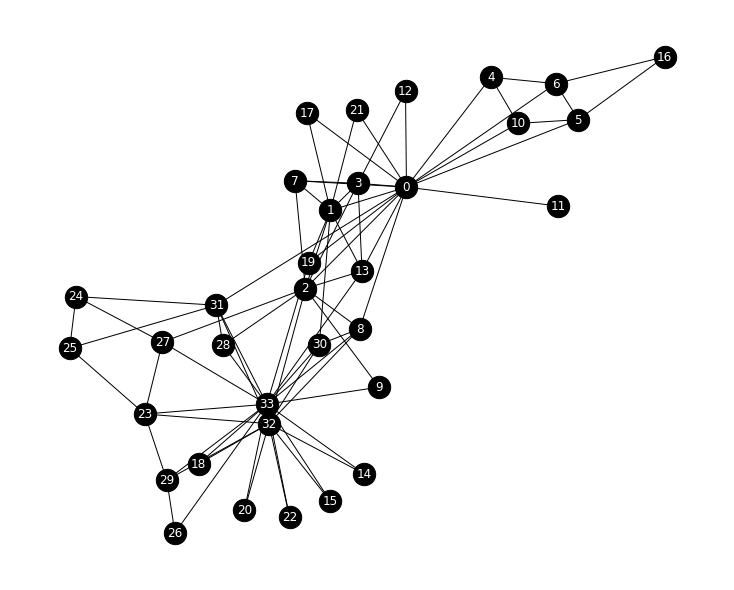

In [32]:
K = nx.karate_club_graph()

plt.figure(figsize=(10, 8))

pos = nx.fruchterman_reingold_layout(K)

nx.draw(K, pos, node_size=500, node_color='black')
nx.draw_networkx_labels(K, pos, font_color='white');

### Order, Size, and Average Degree

**Definition**  
Order - total number of nodes  
Size - total number of edges  
Average Degree - average number of edges that a typical node has

In [33]:
print(f"Order: {K.order()}, Size: {K.size()}, Avg. Degree: {K.size() / K.order():.3f}")

Order: 34, Size: 78, Avg. Degree: 2.294


### Density
The Density of a graph refers to the proportion of the graph's size to the maximum number of edges that a graph can potentially have.

In [34]:
nx.density(K)

0.13903743315508021

### Degree Distribution

In [35]:
degrees = [k for node, k in nx.degree(K)]

In [36]:
print(f"Minimum: {np.min(degrees)}, Maximum: {np.max(degrees)}, Average: {np.mean(degrees):.3f}")

Minimum: 1, Maximum: 17, Average: 4.588


Text(0.5, 1.0, 'Degree Distribution')

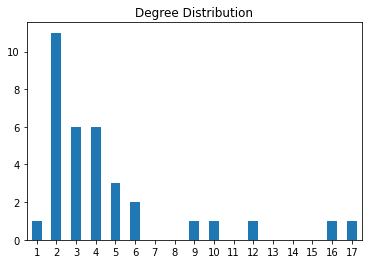

In [37]:
ax = (pd.Series(degrees).value_counts().sort_index()
      .reindex(np.arange(1, 18)).fillna(0).plot.bar(rot=0))
ax.set_title('Degree Distribution')

### Measures of Centrality
Centrality metrics in networks are used to quantify the importance of each node in the graph. Having these metrics allow us to determine the most important nodes.

Interpretations used in this section is taken from [this article](https://theslaps.medium.com/centrality-metrics-via-networkx-python-e13e60ba2740).

#### Degree Centrality: Popularity
The Degree centrality of a node is computed by dividing the degree of a node by the number of other nodes in the graph (Order - 1). This metric represents the **popularity** of a node in the network.

In [38]:
degree_centrality = nx.degree_centrality(K)
degree_centrality

{0: 0.48484848484848486,
 1: 0.2727272727272727,
 2: 0.30303030303030304,
 3: 0.18181818181818182,
 4: 0.09090909090909091,
 5: 0.12121212121212122,
 6: 0.12121212121212122,
 7: 0.12121212121212122,
 8: 0.15151515151515152,
 9: 0.06060606060606061,
 10: 0.09090909090909091,
 11: 0.030303030303030304,
 12: 0.06060606060606061,
 13: 0.15151515151515152,
 14: 0.06060606060606061,
 15: 0.06060606060606061,
 16: 0.06060606060606061,
 17: 0.06060606060606061,
 18: 0.06060606060606061,
 19: 0.09090909090909091,
 20: 0.06060606060606061,
 21: 0.06060606060606061,
 22: 0.06060606060606061,
 23: 0.15151515151515152,
 24: 0.09090909090909091,
 25: 0.09090909090909091,
 26: 0.06060606060606061,
 27: 0.12121212121212122,
 28: 0.09090909090909091,
 29: 0.12121212121212122,
 30: 0.12121212121212122,
 31: 0.18181818181818182,
 32: 0.36363636363636365,
 33: 0.5151515151515151}

Now, we will use these computed values as the node size of our network K.

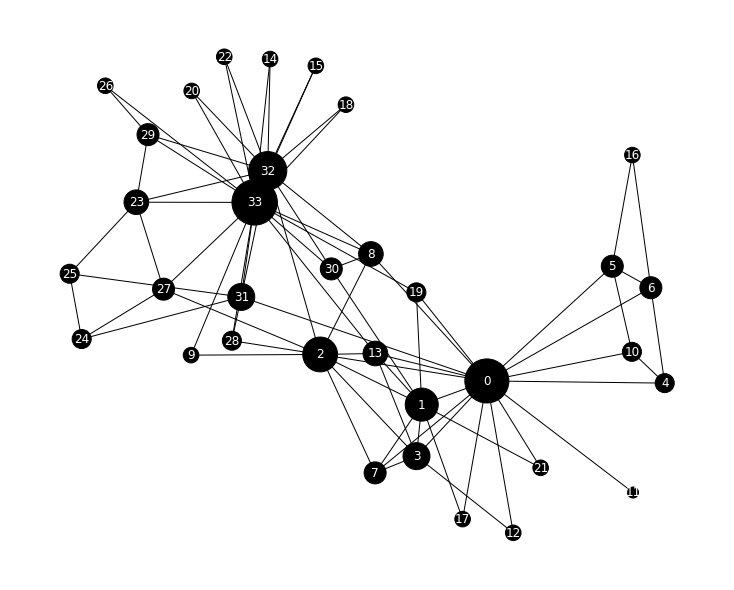

In [39]:
plt.figure(figsize=(10, 8))

pos = nx.fruchterman_reingold_layout(K)

nx.draw(K, pos, node_size=[int(d*4000) for d in degree_centrality.values()], node_color='black')
nx.draw_networkx_labels(K, pos, font_color='white');

#### Eigenvector Centrality: Influence

Graphs can be converted into an adjacency matrix and from there, eigenvectors and eigenvalues can be computed. Relationships coming from high-scoring nodes contribute more to the score of the node as compared to those coming from low-scoring nodes.

This can be interpreted as influence wherein nodes that are connected to influential nodes are themselves influential. For example, a person who is related to the President of the United States (who is very influential) is in turn, also influential.

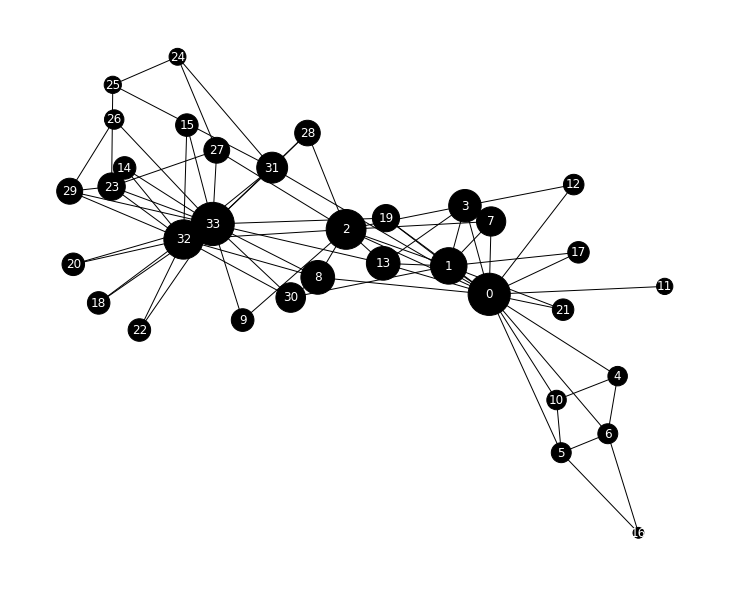

In [40]:
plt.figure(figsize=(10, 8))

eigenvalue_centrality = nx.eigenvector_centrality(K)
pos = nx.fruchterman_reingold_layout(K)

nx.draw(K, pos, node_size=[int(d*5000) for d in eigenvalue_centrality.values()], node_color='black')
nx.draw_networkx_labels(K, pos, font_color='white');

#### Closeness Centrality
Closeness Centrality is computed by getting the reciprocal of the sum of the shortest paths between the node and all the other nodes. That is, the node with the highest closeness centrality is the node with the smallest sum of shortest paths or the **Closest**.

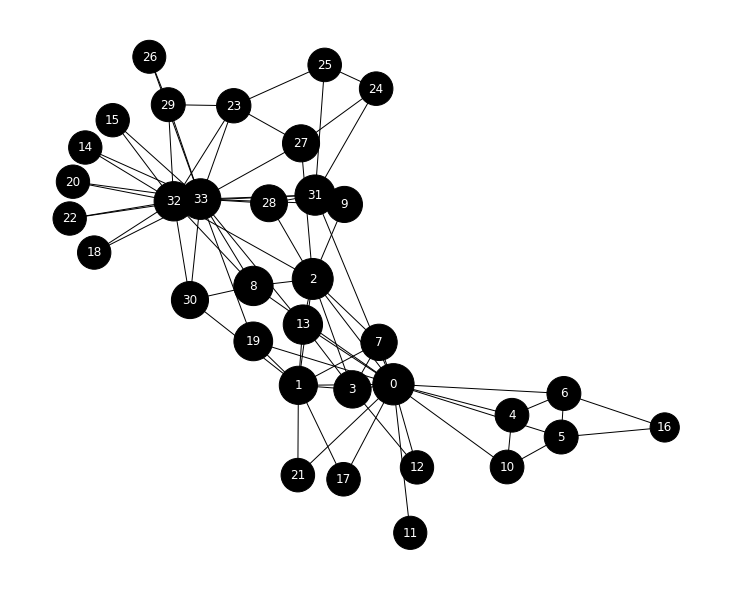

In [41]:
plt.figure(figsize=(10, 8))

closeness_centrality = nx.closeness_centrality(K)
pos = nx.fruchterman_reingold_layout(K)

nx.draw(K, pos, node_size=[int(d*3000) for d in closeness_centrality.values()], node_color='black')
nx.draw_networkx_labels(K, pos, font_color='white');

#### Betweenness Centrality: Bridge
This metric revolves around the idea of how many times a node acts as a bridge between two other nodes. A node with high betweenness centrality can be found in many shortest paths between two nodes.

Removing nodes with high betweenness centrality results to the overall network means that on average, shortest paths across the network becomes longer.

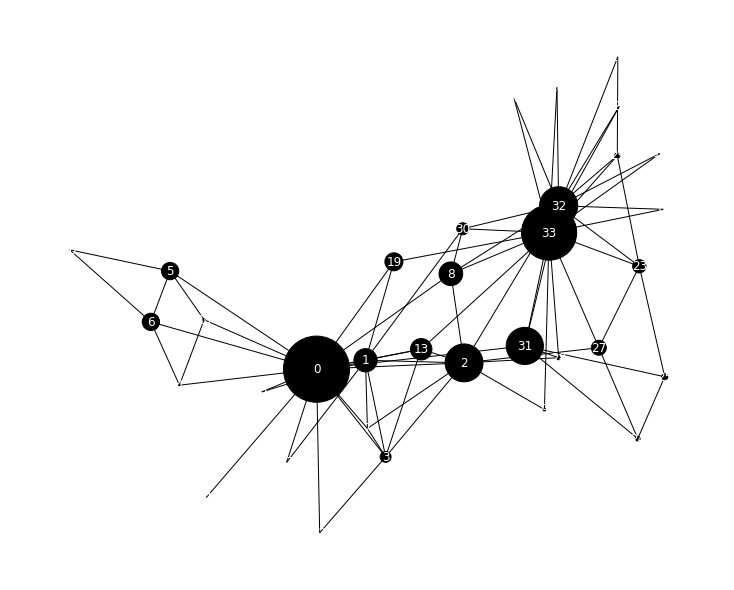

In [42]:
plt.figure(figsize=(10, 8))

betweenness_centrality = nx.betweenness_centrality(K)
pos = nx.fruchterman_reingold_layout(K)

nx.draw(K, pos, node_size=[int(d*10000) for d in betweenness_centrality.values()],
        node_color='black')
nx.draw_networkx_labels(K, pos, font_color='white');

#### Observations

We have observed that there are a few nodes that has high values in different centrality measures. These are nodes: 0, 33, and 32. Without knowing the actual context, we have uncovered nodes that are considered to be central in this network.


Now, let's find out the context of this social network. From the article mentioned above states the following:

>The network has two main players the 'Officer' - John A (node 33) and the instructor - Mr. Hi (node 0). And the story goes that a rift occurred between Mr Hi and John A, causing the karate club to splinter into two new clubs (or factions). One club lead by John A and the other led by Mr Hi.

What this means is that the two nodes 0 and 33 are in fact central figures in this social network!

### Measures of Distance

Another way to describe a network is by computing distances. The most common of which is the shortest path. In this section, we will discuss different distance measures.

In [43]:
# shortest path between two nodes
spath = nx.shortest_path(K, source=33, target=1)
spath

[33, 13, 1]

In [44]:
# length of shortest path
nx.shortest_path_length(K, source=33, target=1)

2

In [45]:
# average shortest path in the Graph
nx.average_shortest_path_length(K)

2.408199643493761

The average shortest path length of the graph tells us that on average, a node can reach any other node between 2 to 3 steps.

In [46]:
# diameter: maximum shortest path in the network
nx.diameter(K)

5

**Six Degrees of Separation**  
The concept of [six degrees of separation (Wikipedia)](https://en.wikipedia.org/wiki/Six_degrees_of_separation) states that every person is just six social connections away from each other. That is, at most, you are six social connections away from your soulmate. Assuming of course that that person exists and has at least one social connection.

The wikipedia site also states that the estimated average shortest path of humanity's social network is at 4.57 in 2016. 

In [47]:
# eccentricity: longest shortest path between a node and all the other node
nx.eccentricity(K, v=0)

3

In [48]:
# periphery: nodes eccentricity equal to the diameter
nx.periphery(K)

[14, 15, 16, 18, 20, 22, 23, 26, 29]

In [49]:
# center: nodes with the minimum eccentricity
nx.center(K)

[0, 1, 2, 3, 8, 13, 19, 31]

## Community Discovery (Network Clustering)

One application of network science is identifying communities/clusters/subgraphs from the given network.

### Greedy Modularity Communities

This method determines subgraphs such that the density is relatively higher within the subgraph than outside.

In [50]:
community_greedy = nx.community.greedy_modularity_communities(K)
community_greedy

[frozenset({8,
            14,
            15,
            18,
            20,
            22,
            23,
            24,
            25,
            26,
            27,
            28,
            29,
            30,
            31,
            32,
            33}),
 frozenset({1, 2, 3, 7, 9, 12, 13, 17, 21}),
 frozenset({0, 4, 5, 6, 10, 11, 16, 19})]

In [51]:
community_greedy = [list(c) for c in community_greedy]
community_greedy

[[8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33],
 [1, 2, 3, 7, 9, 12, 13, 17, 21],
 [0, 16, 19, 4, 5, 6, 10, 11]]

In [52]:
len(community_greedy)

3

In [53]:
colors = ['#df4b4b', '#69c83e', '#2986cc']
color_map = {c: col for comm, col in zip(community_greedy, colors)
             for c in comm}
color_map

{8: '#df4b4b',
 14: '#df4b4b',
 15: '#df4b4b',
 18: '#df4b4b',
 20: '#df4b4b',
 22: '#df4b4b',
 23: '#df4b4b',
 24: '#df4b4b',
 25: '#df4b4b',
 26: '#df4b4b',
 27: '#df4b4b',
 28: '#df4b4b',
 29: '#df4b4b',
 30: '#df4b4b',
 31: '#df4b4b',
 32: '#df4b4b',
 33: '#df4b4b',
 1: '#69c83e',
 2: '#69c83e',
 3: '#69c83e',
 7: '#69c83e',
 9: '#69c83e',
 12: '#69c83e',
 13: '#69c83e',
 17: '#69c83e',
 21: '#69c83e',
 0: '#2986cc',
 16: '#2986cc',
 19: '#2986cc',
 4: '#2986cc',
 5: '#2986cc',
 6: '#2986cc',
 10: '#2986cc',
 11: '#2986cc'}

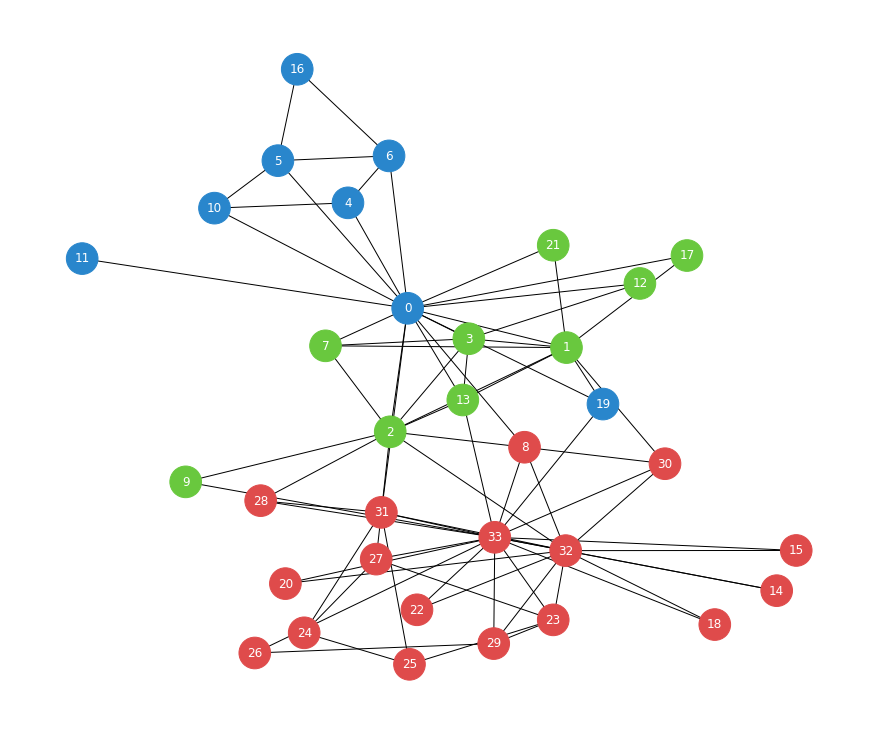

In [54]:
plt.figure(figsize=(12, 10))

pos = nx.fruchterman_reingold_layout(K)

club_labels = nx.get_node_attributes(K,'club')

nx.draw(K, pos, node_size=1000, node_color=[color_map[node] for node in K.nodes()])
nx.draw_networkx_labels(K, pos, font_color='white',
#                         labels=club_labels
                       );

### Girvan-Newman

Girvan-Newman is another community detection algorithm that works by iteratively removing edges based on decreasing betweenness centrality. That is, the network will be decomposed by iteratively removing bridges until subnetworks form.

In [55]:
gn_heirarchy = nx.community.girvan_newman(K)

In [56]:
community_gn = [list(c) for c in next(gn_heirarchy)]
community_gn

[[0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21],
 [2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]]

In [57]:
color_map_gn = {c: col for comm, col in zip(community_gn, colors[:2])
                for c in comm}

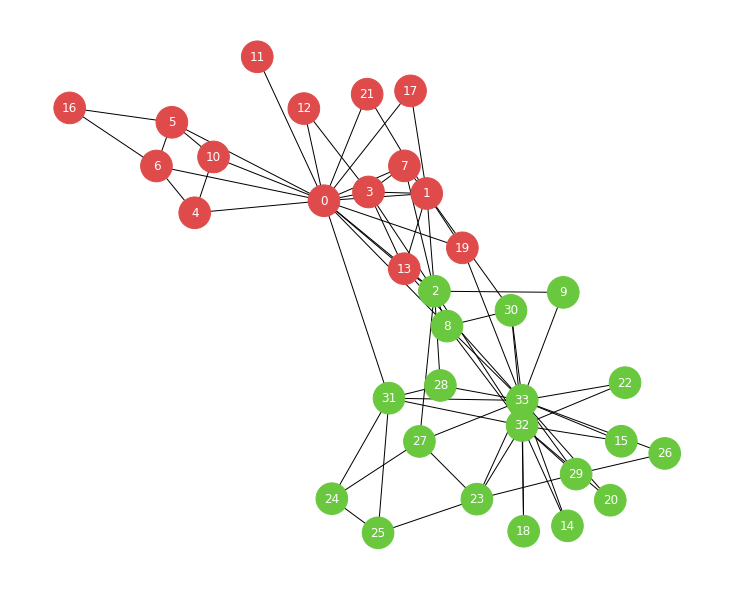

In [58]:
plt.figure(figsize=(10, 8))

pos = nx.fruchterman_reingold_layout(K)

nx.draw(K, pos, node_size=1000, node_color=[color_map_gn[node] for node in K.nodes()])
nx.draw_networkx_labels(K, pos, font_color='white',
#                         labels=club_labels
                       );

As we have observed from the two community detection algorithms above, we see that even without knowing the actual context of the network. Community detection algorithms have the ability to identify latent clusters just from the structure of the network.

The methods we discussed here can be used to describe other networks in real life. For example, our voting preference are affected by our social and psychosocial groups. That is, while we have independent thinking, are judgement is affected by who we talk to and what we see and like in our social media. If we can model that social network, and we correctly identify the voting preference of enough number of people in that social network, we can potentially predict a person's voting preference. This is both fascinating and scary at the same time. 

Given the data that Facebook has, it is possible that they can predict election turnouts based on predicted voting preference. Even more, the content that we see in our news feed can be tweaked in order to influence our votes.

On the flip side, given the data that facebook has, it can also determine accounts that propagates fake news and shut down accounts that violate community policy.